In [1]:
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import numpy as np
import time
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
from astropy.io import fits
%matplotlib inline

In [43]:
db_path = '../kpf_ts_oct2024_v2.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path)
columns_to_display = [
    'ObsID', 'OBJECT', 'DATE-MID', 
    'RV100', 'RV200', 'RV300', 'NOTJUNK']
myTS.display_dataframe_from_db(columns_to_display)

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /code/KPF-Pipeline/kpf_ts_oct2024_v2.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 1188 cols over 27 days in 20241001-20241027; updated 2025-02-06 18:56:34
                      ObsID                    OBJECT  \
0      KP.20241008.31459.57  autocal-etalon-all-night   
1      KP.20241008.25014.55  autocal-etalon-all-night   
2      KP.20241001.10301.86    autocal-etalon-all-eve   
3      KP.20241001.07291.81      autocal-thar-all-eve   
4      KP.20241001.00018.07          autocal-flat-all   
...                     ...                       ...   
14923  KP.20241027.71891.69               WideFlat_f4   
14924  KP.20241027.71942.46               WideFlat_f4   
14925  KP.20241027.71992.22               WideFlat_f5   
14926  KP.20241027.72

In [44]:
df = myTS.dataframe_from_db(columns_to_display)
df = df[df['NOTJUNK'] == 1]

INFO: Plotting from config: /code/KPF-Pipeline/static/tsdb_plot_configs/RV/autocal_etalon_rv.yaml


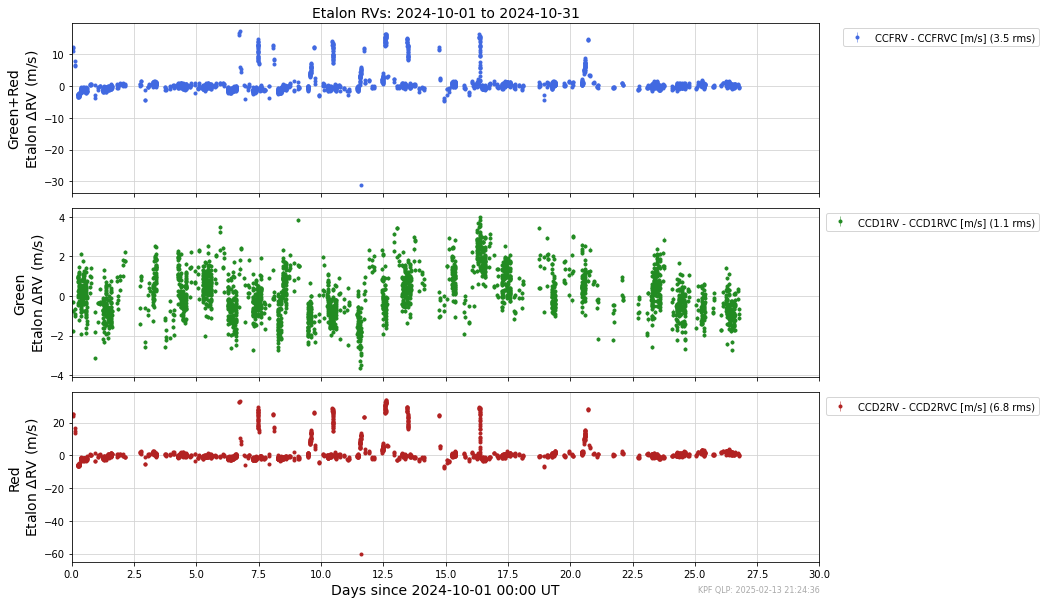

In [45]:
start_date = datetime(2024, 10, 1)
end_date   = datetime(2024, 10, 31)
myTS.plot_time_series_multipanel('autocal_etalon_rv', start_date=start_date, end_date=end_date, show_plot=True, clean=True)

In [94]:
def plot_etalon_per_order(green_wav, red_wav, start_date, end_date):
    dict1 = {'col': f'RV1{green_wav}', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':f'Green RV for SCI1 order {green_wav}', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
    dict2 = {'col': f'RV1{red_wav}', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':f'Red RV for SCI1 order {green_wav}', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
    dict3 = {'col': f'RV1{green_wav}', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':f'Green RV for SCI1 order {green_wav}', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
    dict4 = {'col': f'RV1{red_wav}', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':f'Red RV for SCI2 order {green_wav}', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
    dict5 = {'col': f'RV1{green_wav}', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':f'Green RV for SCI1 order {green_wav}', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
    dict6 = {'col': f'RV1{red_wav}', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':f'Red RV for SCI3 order {green_wav}', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
    thispanelvars = [dict1, dict2]
    thispaneldict = {'ylabel': f'RV for SCI1 order {green_wav}',
                     'legend_frac_size': 0.3}
    orderletpanel1 = {'panelvars': thispanelvars,
                     'paneldict': thispaneldict}

    thispanelvars2 = [dict3, dict4]
    thispaneldict2 = {'ylabel': f'RV for SCI2 order {green_wav}',
                     'legend_frac_size': 0.3}
    orderletpanel2 = {'panelvars': thispanelvars2,
                      'paneldict': thispaneldict2}

    thispanelvars3 = [dict5, dict6]
    thispaneldict3 = {'ylabel': f'RV for SCI3 order {green_wav}',
                     'subtractmedian': 'true',
                     'legend_frac_size': 0.3}
    orderletpanel3 = {'panelvars': thispanelvars3,
                      'paneldict': thispaneldict3}

    panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

    plotdict = {
                 "description": "Etalon RVs per order",
                 "plot_type": "time_series_multipanel",
                 "not_junk": True,
                 "object_like": "etalon",
                 "panel_arr": panel_arr
                }

    myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

Filter out orderlets or orders with 0 weight

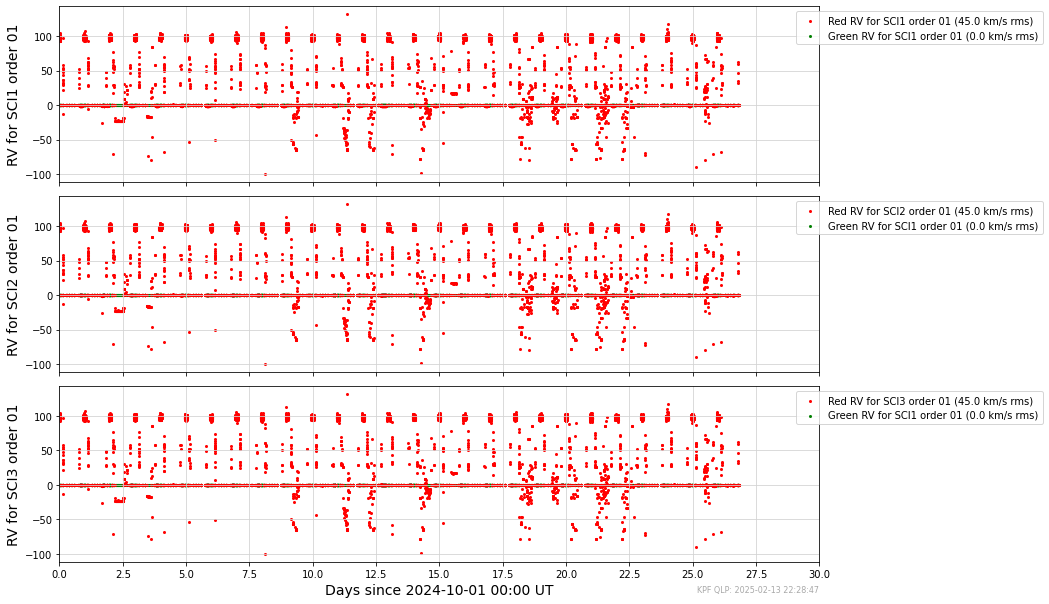

In [95]:
plot_etalon_per_order('01', '36', datetime(2024, 10, 1), datetime(2024, 10, 31))